Data Analysis of the Paris 2024 Olympics: Original Work

Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

Loading the datasets of archive folder

In [33]:
athletes_df = pd.read_csv('./archive/athletes.csv')
events_df = pd.read_csv('./archive/events.csv')
medallists_df = pd.read_csv('./archive/medallists.csv')
medals_total_df = pd.read_csv('./archive/medals_total.csv')
medals_df = pd.read_csv('./archive/medals.csv')
schedules_preliminary_df = pd.read_csv('./archive/schedules_preliminary.csv')
schedules_df = pd.read_csv('./archive/schedules.csv')
teams_df = pd.read_csv('./archive/teams.csv')
torch_route_df = pd.read_csv('./archive/torch_route.csv')
venues_df = pd.read_csv('./archive/venues.csv')


Loading the datasets of the results folder

In [34]:
basketball_3x3_df = pd.read_csv('./archive/results/3x3 Basketball.csv')
archery_df = pd.read_csv('./archive/results/Archery.csv')
artistic_gymnastics_df = pd.read_csv('./archive/results/Artistic Gymnastics.csv')
artistic_swimming_df = pd.read_csv('./archive/results/Artistic Swimming.csv')
athletics_df = pd.read_csv('./archive/results/Athletics.csv')
badminton_df = pd.read_csv('./archive/results/Badminton.csv')
basketball_df = pd.read_csv('./archive/results/Basketball.csv')
beach_volleyball_df = pd.read_csv('./archive/results/Beach Volleyball.csv')
boxing_df = pd.read_csv('./archive/results/Boxing.csv')
breaking_df = pd.read_csv('./archive/results/Breaking.csv')
canoe_slalom_df = pd.read_csv('./archive/results/Canoe Slalom.csv')
canoe_sprint_df = pd.read_csv('./archive/results/Canoe Sprint.csv')
cycling_bmx_freestyle_df = pd.read_csv('./archive/results/Cycling BMX Freestyle.csv')
cycling_bmx_racing_df = pd.read_csv('./archive/results/Cycling BMX Racing.csv')
cycling_mountain_bike_df = pd.read_csv('./archive/results/Cycling Mountain Bike.csv')
cycling_road_df = pd.read_csv('./archive/results/Cycling Road.csv')
cycling_track_df = pd.read_csv('./archive/results/Cycling Track.csv')
diving_df = pd.read_csv('./archive/results/Diving.csv')
equestrian_df = pd.read_csv('./archive/results/Equestrian.csv')
fencing_df = pd.read_csv('./archive/results/Fencing.csv')
football_df = pd.read_csv('./archive/results/Football.csv')
golf_df = pd.read_csv('./archive/results/Golf.csv')
handball_df = pd.read_csv('./archive/results/Handball.csv')
hockey_df = pd.read_csv('./archive/results/Hockey.csv')
judo_df = pd.read_csv('./archive/results/Judo.csv')
marathon_swimming_df = pd.read_csv('./archive/results/Marathon Swimming.csv')
modern_pentathlon_df = pd.read_csv('./archive/results/Modern Pentathlon.csv')
rhythmic_gymnastics_df = pd.read_csv('./archive/results/Rhythmic Gymnastics.csv')
rowing_df = pd.read_csv('./archive/results/Rowing.csv')
rugby_sevens_df = pd.read_csv('./archive/results/Rugby Sevens.csv')
sailing_df = pd.read_csv('./archive/results/Sailing.csv')
shooting_df = pd.read_csv('./archive/results/Shooting.csv')
skateboarding_df = pd.read_csv('./archive/results/Skateboarding.csv')
sport_climbing_df = pd.read_csv('./archive/results/Sport Climbing.csv')
surfing_df = pd.read_csv('./archive/results/Surfing.csv')
swimming_df = pd.read_csv('./archive/results/Swimming.csv')
table_tennis_df = pd.read_csv('./archive/results/Table Tennis.csv')
taekwondo_df = pd.read_csv('./archive/results/Taekwondo.csv')
tennis_df = pd.read_csv('./archive/results/Tennis.csv')
trampoline_gymnastics_df = pd.read_csv('./archive/results/Trampoline Gymnastics.csv')
triathlon_df = pd.read_csv('./archive/results/Triathlon.csv')
volleyball_df = pd.read_csv('./archive/results/Volleyball.csv')
water_polo_df = pd.read_csv('./archive/results/Water Polo.csv')
weightlifting_df = pd.read_csv('./archive/results/Weightlifting.csv')
wrestling_df = pd.read_csv('./archive/results/Wrestling.csv')

Will not be looking at results yet. These will be done individually as I perform an analysis of each sport. 

Beginning with an analysis of the athletes themselves.

First '.head()' to get a quick first look at the data itself

In [35]:
athletes_df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,"Father, Francisco Ramon Valencia Fontes. Mothe...",Spanish,National/personal: Miguel Angel Flores (MEX),Grew up close to an archery range and was alwa...,NaN,NaN,NaN,NaN,NaN,NaN
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,Two brothers,"English, Spanish",National: Miguel Angel Flores (MEX).<br>Person...,She followed her brothers into archery,NaN,NaN,NaN,NaN,NaN,NaN
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,"Father, Nicolas",Spanish,National: David Alejandro Velez Sanchez (MEX),His father introduced him to the sport and the...,NaN,NaN,NaN,NaN,NaN,NaN
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,NaN,"German, Spanish",National: David Alejandro Velez Sanchez (MEX),He was inspired by the Disney animated movie R...,NaN,NaN,NaN,NaN,NaN,NaN
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,...,"Partner, Karla. One son (born October 2022)",Spanish,National: David Alejandro Velez Sanchez (MEX),NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next '.shape' to determine the size of the data

In [36]:
athletes_df.shape

(11115, 35)

'.info()' to see what data types are present and the different columns available. Notice the datatype for date fields. These will need to be corrected later if used in an analysis.

In [37]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11115 non-null  int64  
 1   name                11115 non-null  object 
 2   name_short          11115 non-null  object 
 3   name_tv             11115 non-null  object 
 4   gender              11115 non-null  object 
 5   function            11115 non-null  object 
 6   country_code        11115 non-null  object 
 7   country             11115 non-null  object 
 8   country_full        11115 non-null  object 
 9   nationality         11098 non-null  object 
 10  nationality_full    11098 non-null  object 
 11  nationality_code    11098 non-null  object 
 12  height              11115 non-null  int64  
 13  weight              11099 non-null  float64
 14  disciplines         11115 non-null  object 
 15  events              11115 non-null  object 
 16  birt

'.isnull().sum()' to see how many null values are present if any

In [38]:
athletes_df.isnull().sum()

code                      0
name                      0
name_short                0
name_tv                   0
gender                    0
function                  0
country_code              0
country                   0
country_full              0
nationality              17
nationality_full         17
nationality_code         17
height                    0
weight                   16
disciplines               0
events                    0
birth_date                0
birth_place            2397
birth_country          1649
residence_place        4321
residence_country      2834
nickname               8150
hobbies                6913
occupation             1539
education              5583
family                 5555
lang                    523
coach                  2899
reason                 5274
hero                   7801
influence              8962
philosophy             8334
sporting_relatives     8596
ritual                10259
other_sports          10058
dtype: int64

Due to many missing data we must consider what we can actually perform an analysis of. Many of these nulls are insignificant and will not harm the exploratory data analysis steps. For this reason they will be ignored and left in place, however, it is important to note their presence and refer back to this when we begin analyzing the athletes.

The first thing I am interested in is the distribution of athletes by gender.

In [39]:
athletes_df['gender'].value_counts()

gender
Male      5655
Female    5460
Name: count, dtype: int64

In [40]:
athletes_df['gender'].describe()

count     11115
unique        2
top        Male
freq       5655
Name: gender, dtype: object

Visualizing this Distribution

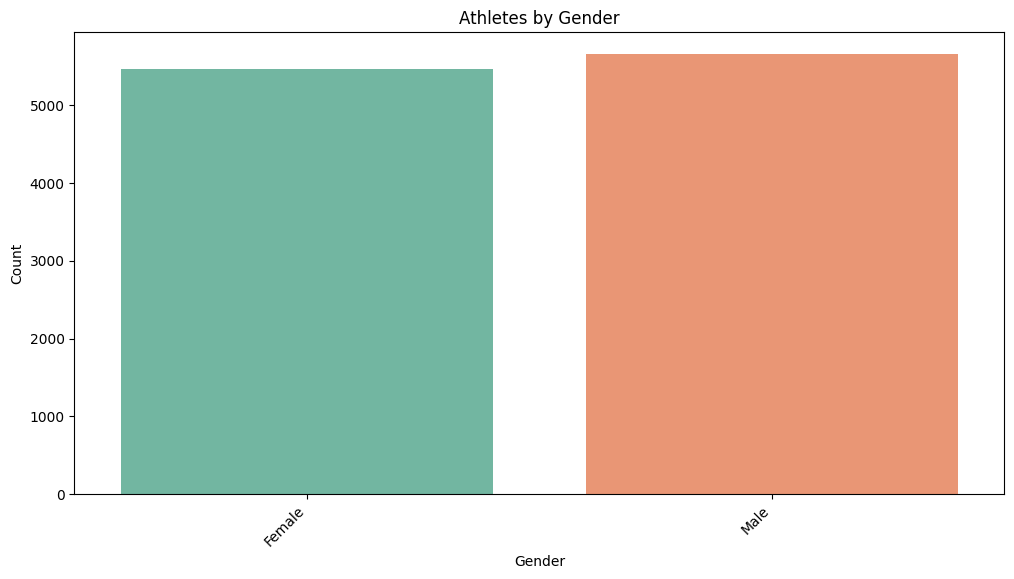

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=athletes_df, x='gender', hue='gender', palette='Set2')
plt.title('Athletes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Determining the count of Gender based on the top 5 countries. Top 5 countries is determined by the countries with the most athletes.

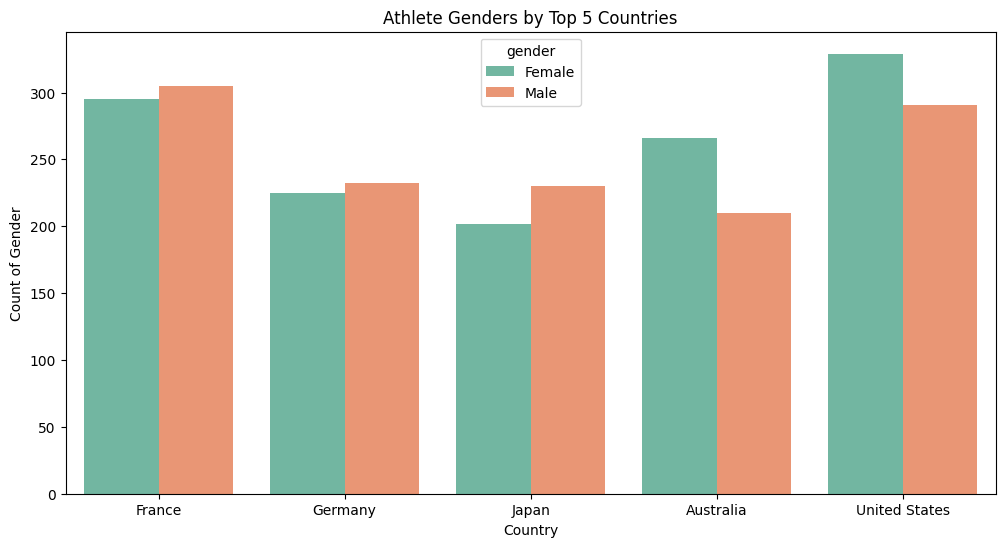

In [42]:
top_five_countries_df = athletes_df['country'].value_counts().head(5)
athletes_by_country_filtered_df = athletes_df.merge(top_five_countries_df.to_frame(name='count'), on='country', how='inner')

plt.figure(figsize=(12,6))
sns.countplot(data=athletes_by_country_filtered_df, x='country', hue='gender', palette='Set2')
plt.title('Athlete Genders by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count of Gender')
plt.show()

Country percentage of athletes.

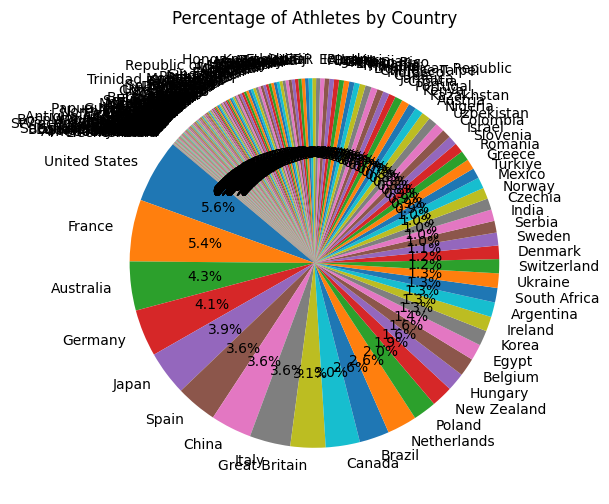

In [43]:
country_counts = athletes_df['country'].value_counts()
country_percentages = (country_counts /country_counts.sum()) *100
plt.figure(figsize=(12,6))
plt.pie(country_percentages, labels = country_percentages.index, autopct = '%1.1f%%', startangle=140)
plt.title('Percentage of Athletes by Country')
plt.show()

Creating a word cloud as an alternative and fun way to show the number of athletes each country sent to the olympics

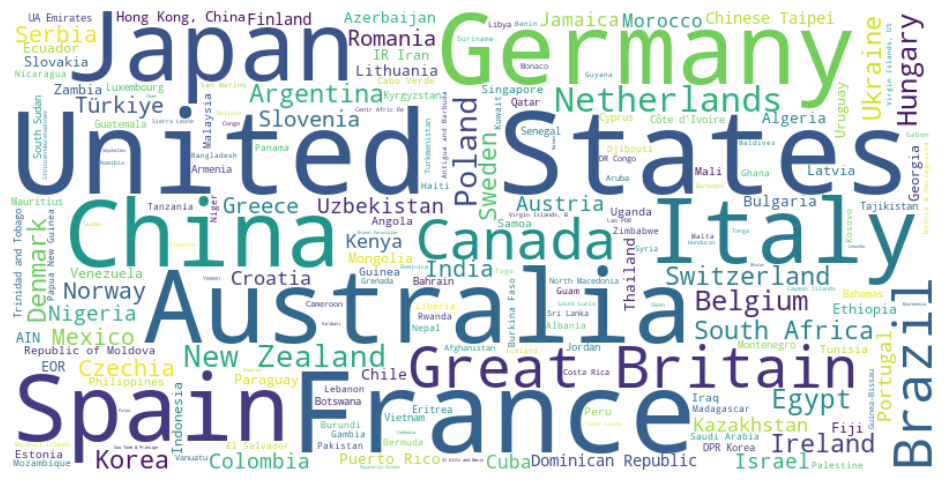

In [45]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(country_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()